# Práctica 4: Modelado de Datos - Regresión

1. Cargas librerias
2. Leer/seleccioar/renombrar datos
3. Limpieza de Datos
4. Transformacion de Datos
5. Correlacion
6. Partición del conjunto de datos
7. Entrenamiento y predicción
8. Predecir nuevos registros

## 1. Cargar librerias

In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing #para la limpieza
from sklearn.preprocessing import LabelEncoder #Para la renovacion
from sklearn import linear_model #para la regresion lineal
from sklearn.neural_network import MLPRegressor #Para la red neuronal
from sklearn.model_selection import train_test_split #Para particionar el conjunto de datos

## 2. Leer/seleccionar/renombrar datos

In [4]:
#Leer Datos
df = pd.read_csv('surveys.csv')
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [5]:
# Seleccion de datos
df = df[['species_id','sex','hindfoot_length','weight']]
# Renombre de Datos
df.columns = ['especie','sexo','tamaño_pata','peso']
df.head()


,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,NaN
1,NL,M,33.0,NaN
2,DM,F,37.0,NaN
3,DM,M,36.0,NaN
4,DM,M,35.0,NaN


## 3. Limpieza de Datos

In [6]:
df.isnull().sum()

especie         763
sexo           2511
tamaño_pata    4111
peso           3266
dtype: int64

In [7]:
df.shape

(35549, 4)

In [8]:
df.dtypes

especie         object
sexo            object
tamaño_pata    float64
peso           float64
dtype: object

# 3.1 Reemplazar valores perdidos con moda

In [9]:
PromTamPata = df['tamaño_pata'].mean()

PromPeso = df['peso'].mean()

df['tamaño_pata'] =  df['tamaño_pata'].replace(np.nan, PromTamPata)

df['peso'] = df['peso'].replace(np.nan, PromPeso)
df.head()

,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,42.672428
1,NL,M,33.0,42.672428
2,DM,F,37.0,42.672428
3,DM,M,36.0,42.672428
4,DM,M,35.0,42.672428


## 3.2 Reemplazar valores perdidos con moda

In [10]:
ModaSexo = df['sexo'].mode()
print(ModaSexo)

ModaEspecie = df['especie'].mode()
print(ModaEspecie)

0    M
Name: sexo, dtype: object
0    DM
Name: especie, dtype: object


In [11]:
df['sexo'] = df['sexo'].fillna('M')

df['especie'] = df['especie'].fillna('DM')

df.head()

,especie,sexo,tamaño_pata,peso
0,NL,M,32.0,42.672428
1,NL,M,33.0,42.672428
2,DM,F,37.0,42.672428
3,DM,M,36.0,42.672428
4,DM,M,35.0,42.672428


# 4. Transformación de Datos

In [12]:

encoder = preprocessing.LabelEncoder()
encoder.fit(df['sexo'])

df['sexo'] = encoder.transform(df['sexo'])
encoder.fit(df['especie'])

df['especie'] = encoder.transform(df['especie'])
df.head()


,especie,sexo,tamaño_pata,peso
0,15,1,32.0,42.672428
1,15,1,33.0,42.672428
2,11,0,37.0,42.672428
3,11,1,36.0,42.672428
4,11,1,35.0,42.672428


# 5. Correlacion

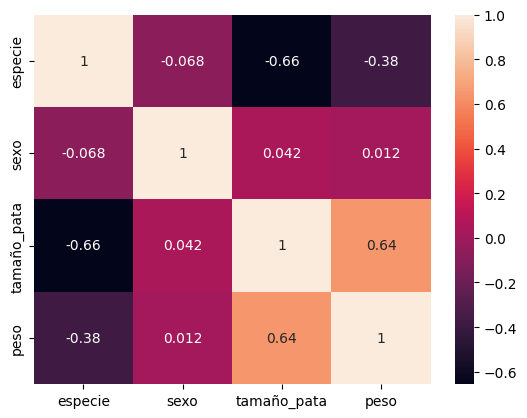

In [16]:
# Calcular matriz de correlación
corre_mat = df.corr()

#Graficar matriz de correlacion
sns.heatmap(corre_mat, annot = True) #annot = true para mostrar valores en cada cuadro
plt.show()


1. en las variables explicativas busca valores mayores a .9 o menores a -.9.2.  si hay algun valor en ese rango identifica las variables que se relacionan a ese valo. 3. - decidir cual de las dos variables debe permanecer en la relación, para eso se fija en cual influencia mas la variable respuesta es decir, cual tiene corelación mas alta en la variable respuesta 

## 6. Partición del conjunto de Datos 

In [50]:
# definir X y Y 
X1 = df[['tamaño_pata']]
y1 = df[['peso']]
X2 = df[['especie', 'sexo', 'tamaño_pata']]
y2 = df[['peso']]
# Separar los conjuntos de datos en entrenamiento "train" y prueba "test"
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test =train_test_split(X2, y2, test_size=0.2)


## 7. Entrenamiento

### 7.1 Regresion lineal simple

In [51]:
#Definir el algoritmo
RLS = linear_model.LinearRegression()

#Entrenar el modelo
RLS.fit(X1_train, y1_train)

#Realizar predicción
RLS.predict(X1_test)

#Calcular precisión
r2_RLS = RLS.score(X1_test, y1_test)
print()
print('La precision del modelo de regresión lineal smple es: ')
print(r2_RLS)



La precision del modelo de regresión lineal smple es: 
0.38017797216483107


## 7.2 Regresión lineal múltiple

In [52]:
#Definir el algoritmo
RLM = linear_model.LinearRegression()

#Entrenar el modelo
RLM.fit(X2_train, y2_train)

#Realizar predicción
RLM.predict(X2_test)

#Calcular precisión
r2_RLM = RLM.score(X2_test, y2_test)
print()
print('La precision del modelo de regresión lineal multiple es: ')
print(r2_RLM)



La precision del modelo de regresión lineal multiple es: 
0.4197701891971739


## 7.3 Red Neuronal

In [57]:
# Definir el algoritmo
NN = MLPRegressor(hidden_layer_sizes=(100,100,200))

# Entrenar el modelo 
NN.fit(X2_train, y2_train)

#Realizar predicción 
NN.predict(X2_test)

#Calcular precisión 
r2_NN = NN.score(X2_test, y2_test)
print()
print('La precisión del modelo de Red Neuronal : ')
print(r2_NN)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



La precisión del modelo de Red Neuronal : 
0.8413419542345957


## 8. Predecir con nuevos registros

In [62]:
# Predecir cual será el peso de una nueva especie X_new
# X2 = df[['especie', 'sexo', 'tamaño_pata']]

X_new = np.array([[11, 0, 25]])
Prediccion = NN.predict(X_new)

print('El peso de la esecie X-new es: ', Prediccion)

El peso de la esecie X-new es:  [43.84571784]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
